In [68]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override

Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.54)


<function yfinance.pdr_override>

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. OBTENDO E TRATANDO OS DADOS




In [67]:

tickers = "WEGE3.SA BBAS3.SA JHSF3.SA"
carteira = yf.download (tickers, period="10y")["Adj Close"]
ibov = yf.download("^BVSP", period="10y")["Adj Close"]

[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  1 of 1 completed


In [69]:
carteira

,BBAS3.SA,JHSF3.SA,WEGE3.SA
Date,,,
2010-08-26,16.073187,2.323734,3.633248
2010-08-27,16.101686,2.423322,3.675493
2010-08-30,15.759694,2.423322,3.645920
2010-08-31,16.232767,2.481416,3.591002
2010-09-01,16.677359,2.489715,3.603677
...,...,...,...
2020-08-20,32.212036,8.560000,67.220001
2020-08-21,32.508011,8.230000,67.599998
2020-08-24,33.450001,7.920000,66.470001


In [70]:
ibov

Date
2010-08-26     63867.000000
2010-08-27     65585.000000
2010-08-30     64261.000000
2010-08-31     65145.000000
2010-09-01     67073.000000
                  ...      
2020-08-20    101468.000000
2020-08-21    101521.000000
2020-08-24    102298.000000
2020-08-25    102118.000000
2020-08-26    101807.523438
Name: Adj Close, Length: 2471, dtype: float64

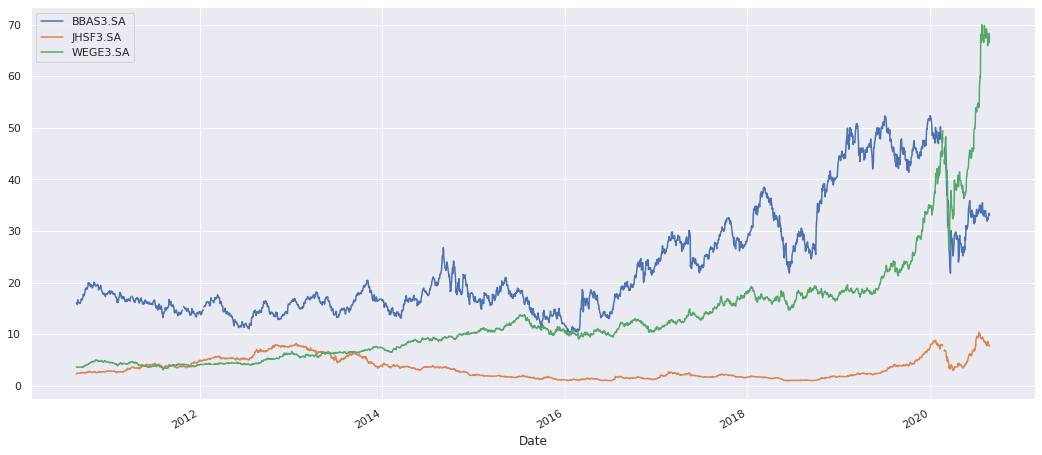

In [71]:
sns.set()
carteira.plot(figsize=(18,8))
plt.legend()

In [79]:
carteira_normalizada = (carteira / carteira.iloc[0])*10000
carteira_normalizada

,BBAS3.SA,JHSF3.SA,WEGE3.SA
Date,,,
2010-08-26,10000.000000,10000.000000,10000.000000
2010-08-27,10017.731147,10428.571604,10116.273774
2010-08-30,9804.959167,10428.571604,10034.876423
2010-08-31,10099.283504,10678.572477,9883.722288
2010-09-01,10375.887966,10714.287033,9918.607899
...,...,...,...
2020-08-20,20040.852125,36837.267656,185013.506182
2020-08-21,20224.994034,35417.135641,186059.394651
2020-08-24,20811.056964,34083.078078,182949.237703


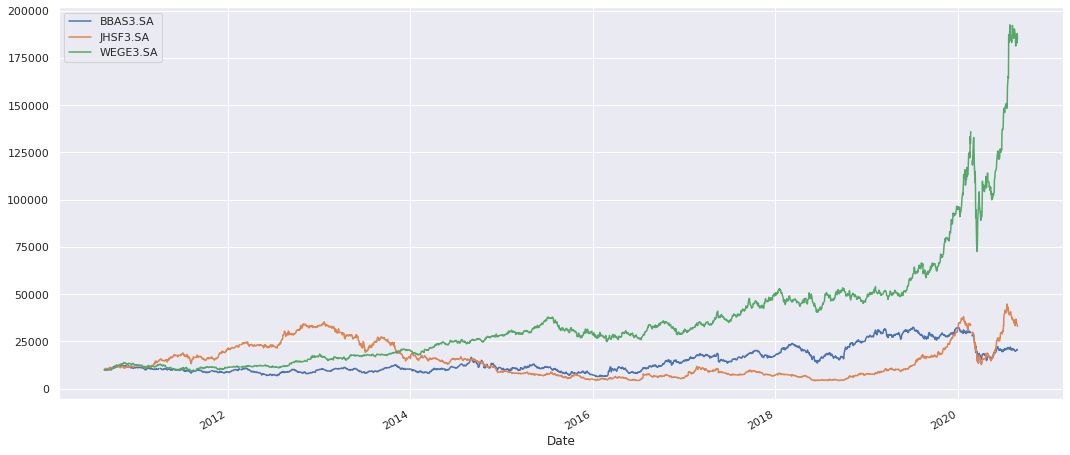

In [80]:
carteira_normalizada.plot(figsize=(18,8))

In [81]:
carteira_normalizada["saldo"] = carteira_normalizada.sum(axis=1)

In [82]:
carteira_normalizada

,BBAS3.SA,JHSF3.SA,WEGE3.SA,saldo
Date,,,,
2010-08-26,10000.000000,10000.000000,10000.000000,30000.000000
2010-08-27,10017.731147,10428.571604,10116.273774,30562.576525
2010-08-30,9804.959167,10428.571604,10034.876423,30268.407195
2010-08-31,10099.283504,10678.572477,9883.722288,30661.578269
2010-09-01,10375.887966,10714.287033,9918.607899,31008.782899
...,...,...,...,...
2020-08-20,20040.852125,36837.267656,185013.506182,241891.625963
2020-08-21,20224.994034,35417.135641,186059.394651,241701.524326
2020-08-24,20811.056964,34083.078078,182949.237703,237843.372745


In [83]:
ibov_normalizado = (ibov / ibov.iloc[0])*30000

In [84]:
ibov_normalizado

Date
2010-08-26    30000.000000
2010-08-27    30806.989525
2010-08-30    30185.072103
2010-08-31    30600.310019
2010-09-01    31505.942036
                  ...     
2020-08-20    47662.172953
2020-08-21    47687.068439
2020-08-24    48052.045657
2020-08-25    47967.494950
2020-08-26    47821.655990
Name: Adj Close, Length: 2471, dtype: float64

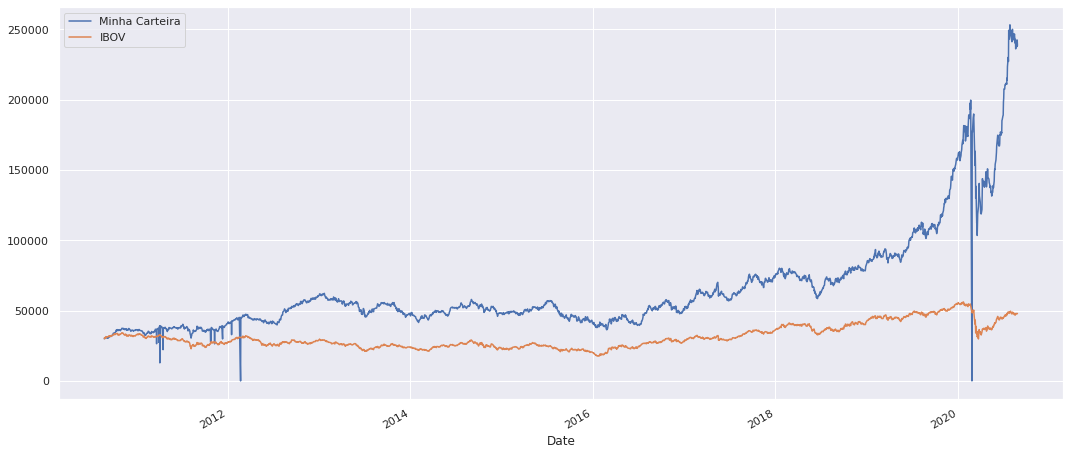

In [85]:
carteira_normalizada["saldo"].plot(figsize=(18,8), label="Minha Carteira")
ibov_normalizado.plot(label="IBOV")
plt.legend()

In [86]:
carteira_normalizada.describe()

,BBAS3.SA,JHSF3.SA,WEGE3.SA,saldo
count,2467.000000,2474.000000,2476.000000,2478.000000
mean,14529.554353,14671.141067,36156.439598,65239.773218
std,6715.936308,8799.759333,29679.837636,36964.658822
min,6408.578923,4147.901194,8974.626726,0.000000
25%,9776.253151,7450.114124,16614.835224,44513.290028
50%,11359.341230,11821.429062,29095.879847,52980.722119
75%,17762.925480,19563.502430,46260.887563,71964.814266
max,32564.381613,44812.724556,192527.431684,253310.524949
